<h1>DEMO OBJECT DETECTION & OCR STRUK BELANJA</h1>

<h2>1. Impor Dependencies</h2>

In [1]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import urllib.request

from matplotlib import pyplot as plt

<h3>1.1. Install and Import Pytesseract</h3>

In [2]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [3]:
import pytesseract

<h2>2. Clone Github Repo</h2>

In [4]:
repo_url = "https://github.com/dzakialaqsha/OCR-Struk-Belanja.git"

!git clone {repo_url}

Cloning into 'OCR-Struk-Belanja'...
remote: Enumerating objects: 1525, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1525 (delta 0), reused 0 (delta 0), pack-reused 1521 (from 1)
Receiving objects: 100% (1525/1525), 151.34 MiB | 19.09 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (1432/1432), done.


In [5]:
%cd /content/OCR-Struk-Belanja/

/content/OCR-Struk-Belanja


<h2>3. Load Saved Models</h2>

In [6]:
model = tf.keras.models.load_model("./Object Detection/Saved Models/model.keras")
model_1 = tf.keras.models.load_model("./Object Detection/Saved Models/model_1.keras")
model_2 = tf.keras.models.load_model("./Object Detection/Saved Models/model_2.keras")
model_3 = tf.keras.models.load_model("./Object Detection/Saved Models/model_3.keras")

In [7]:
#import function dari repo
%cd "/content/OCR-Struk-Belanja/Object Detection/"
import object_detection as od

/content/OCR-Struk-Belanja/Object Detection


In [8]:
def print_img(img_url):
    predicted_box, predicted_box1, predicted_box2, predicted_box3 = od.object_detection(img_url, model, model_1, model_2, model_3)

    #open url and read the image
    req = urllib.request.urlopen(img_url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv.imdecode(arr, cv.IMREAD_GRAYSCALE) #convert to grayscale

    temp_color_img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
    #x,y,w,h = predicted_box
    #cropped_struk = img[y:y+h, x:x+w]

    cv.rectangle(temp_color_img, predicted_box.numpy(), (255,255,0), 2) #struk
    cv.rectangle(temp_color_img, predicted_box1.numpy(), (128,0,156), 2) #info toko
    cv.rectangle(temp_color_img, predicted_box2.numpy(), (255,0,0), 2) #item belanja
    cv.rectangle(temp_color_img, predicted_box3.numpy(), (0,56,56), 2) #total

    plt.imshow(temp_color_img)
    plt.axis("off")
    plt.show()

In [11]:
def ocr_struk(img_url):
    predicted_box, predicted_box1, predicted_box2, predicted_box3 = od.object_detection(img_url, model, model_1, model_2, model_3)

    #open url and read the image
    req = urllib.request.urlopen(img_url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv.imdecode(arr, cv.IMREAD_GRAYSCALE) #convert to grayscale

    x,y,w,h = predicted_box
    cropped_struk = img[y:y+h, x:x+w]

    options = "--psm 6"
    text = pytesseract.image_to_string(
        cv.cvtColor(cropped_struk, cv.COLOR_BGR2RGB), config=options
    )

    return(text)

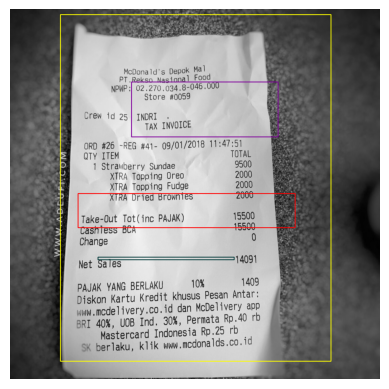

McDonald's Depok Mal
PT.Rekso Nasional Food
NPHP; 02.270.034.8-046 .000
Store #0059 a
Crew id 25 INDRI . 3

TAX INVOICE im
ORD #26 -REG #41- 09/01/2018 11:47:51 ee

em QTY ITEM TOTAL
Z 1 Strawberry Sundae 9500
f XTRA Topping Oreo 2000 :

XTRA Topping Fudge 2000 lege

: XTRA Dried Brownies 2000 oe
§ Take-Out Tot(inc PAJAK) 15500 S
Cashless BCA 15500
Change 0 f

Net Sales 14091
PAJAK YANG BERLAKU 10% 1409 :
Diskon Kartu Kredit khusus Pesan Antar: ff
www.medelivery.co.id dan McDelivery app |
BRT 40%, UOB Ind. 30%, Permata Rp.40 rb 9

Mastercard Indonesia Rp.25 rb
SK berlaku, klik www .medonalds.co. id



In [13]:
test_img = "https://2.bp.blogspot.com/-YvHcf9Gd8ps/WlloYmEgleI/AAAAAAAAC7E/A3oiQAMJfLMGGHejdrzLkyvDNUc-jK7_ACLcBGAs/s1600/struk.jpeg"

print_img(test_img)
print(ocr_struk(test_img))